In [2]:
import cv2 
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
import torch
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
def plot_mean(features):
    plt.clf()
    ind = list(range(8))
    for i in range(8, 68, 12): 
        ii = list(range(i, i+4))
        a = np.mean(features[:, ii], axis=1)
        features[:, i] = a
        ind += [i]

    for i in ind:
        f = features[i] 
        features[i] = (features[i] - f.min()) / (f.max() - f.min())

    fig, axs = plt.subplots(4,4)
    axs = axs.flatten()
    for ax in axs[len(ind):]:
        ax.remove()
        
    for i, ax in enumerate(axs):
        if i < len(ind):
            a = 1
            g=ax.imshow(features[ind[i]])
            ax.axis('off')
    fig.set_size_inches(9, 9.2)
    fig.subplots_adjust(wspace=0, hspace=0)


def plot(features, mean=True):   
    features[3][features[3] == 0] = -1
    
    for i in range(44, 44+12):
        features[i][features[i] == 0] = -1
    
    for i in range(len(features)):
        f = features[i] 
        features[i] = (features[i] - f.min()) / (f.max() - f.min())
        
    if mean: 
        plot_mean(features)
        return

    plt.clf()
    fig, axs = plt.subplots(7,10)
    axs = axs.flatten()
    for ax in axs[len(features):]:
        ax.remove()

    for i, f in enumerate(features):
        g= axs[i].imshow(f)
        axs[i].axis('off')
    fig.set_size_inches(15, 10.7)
    fig.subplots_adjust(wspace=0, hspace=0)
    fig.show()

# Healthy

<Figure size 432x288 with 0 Axes>

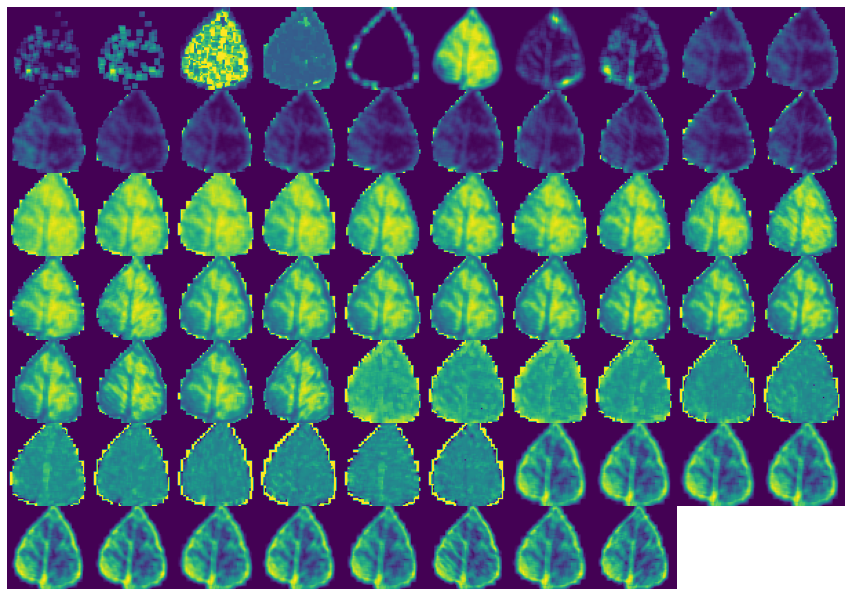

In [6]:
features = torch.load('..\\data\\Healthy_sample.pth')[0]
plot(features, mean=False)

<Figure size 432x288 with 0 Axes>

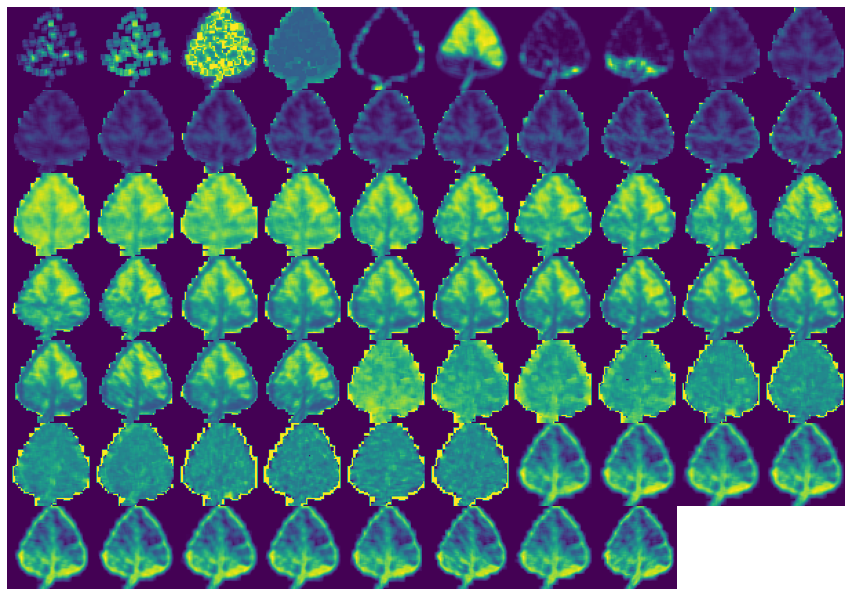

In [5]:
features = torch.load('..\\data\\Healthy_sample.pth')[0]
plot(features, mean=False)

<Figure size 432x288 with 0 Axes>

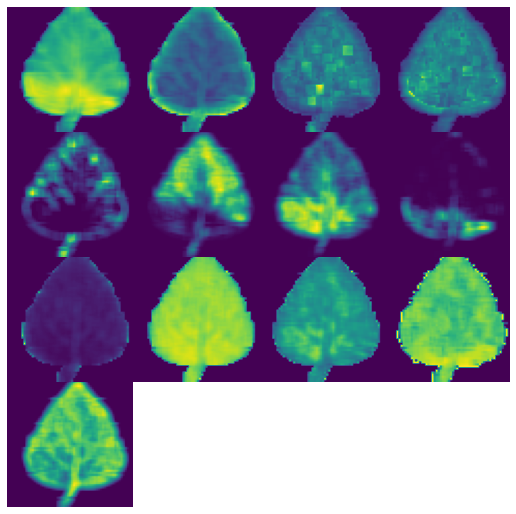

In [147]:
features = torch.load('..\\data\\Healthy_sample.pth')[0]
plot(features, mean=True)

# Bacterial_spot

<Figure size 432x288 with 0 Axes>

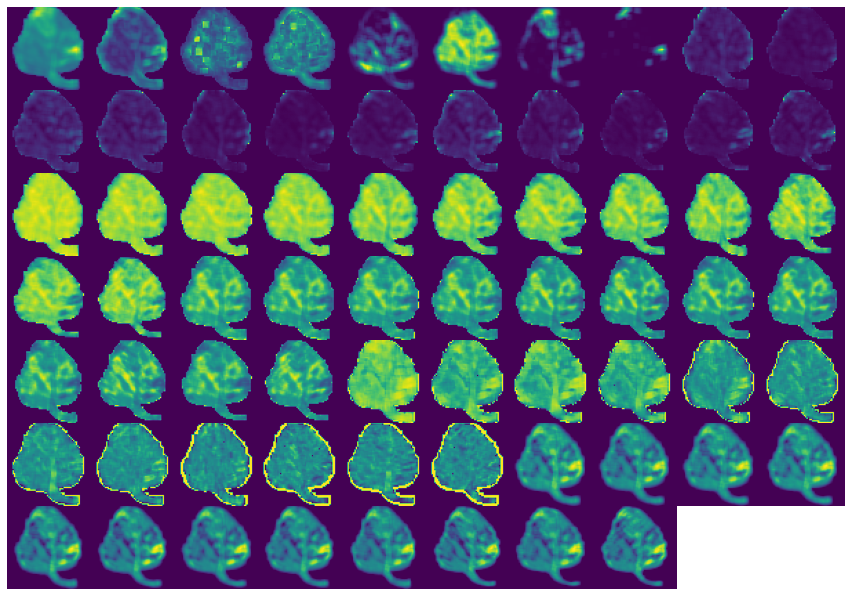

In [148]:
features = torch.load('..\\data\\Bacterial_spot_sample.pth')[0]
plot(features, mean=False)

<Figure size 432x288 with 0 Axes>

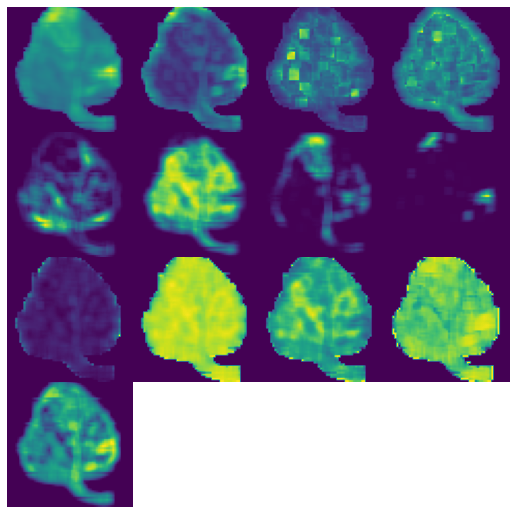

In [149]:
features = torch.load('..\\data\\Bacterial_spot_sample.pth')[0]
plot(features, mean=True)

# NDVI

## Healthy

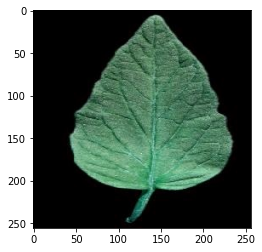

In [206]:
img = cv2.imread('..\\sample\\Healthy.jpg')
plt.imshow(img)

-1.0 1.0


(-0.5, 255.5, 255.5, -0.5)

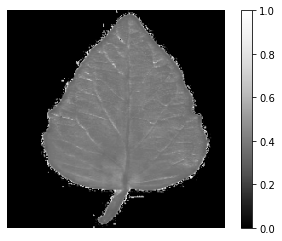

In [207]:
img = img.astype(float)
red = img[:, :, 2]
green = img[:, :, 1]
ndvi = (green - red) / (green + red)
ndvi[(red == 0) & (green == 0)] = 0
a = ndvi

print(ndvi.min(), ndvi.max())

'''plot hist'''
mean=0.247
std=0.19
ndvi = (ndvi - mean) / std
ndvi = (ndvi + 3) / 6
_ = plt.hist(ndvi.flatten(), np.arange(0, 1.001, 1e-2))

# '''Show ndvi'''
ndvi[a==0] = 0
ndvi[(ndvi < 0) | (ndvi > 1)] = 0
plt.imshow(ndvi, cmap='Greys_r', vmin=0, vmax=1)
plt.colorbar()
plt.axis('off')

<Figure size 432x288 with 0 Axes>

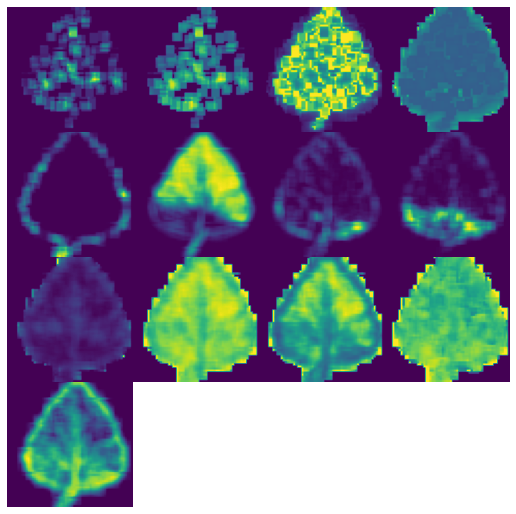

In [218]:
features = torch.load('..\\data\\Healthy_ndvi_sample.pth')[0]
plot(features, mean=True)

<Figure size 432x288 with 0 Axes>

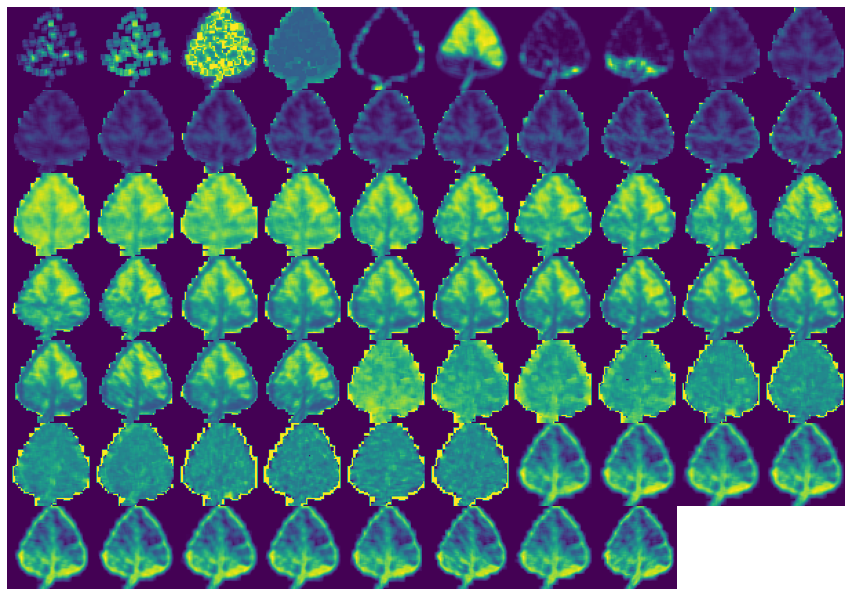

In [219]:
features = torch.load('..\\data\\Healthy_ndvi_sample.pth')[0]
plot(features, mean=False)

## Bacterial spot

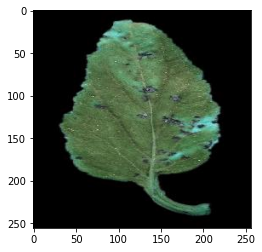

In [199]:
img = cv2.imread('..\\sample\\Bacterial_spot.jpg')
plt.imshow(img)

-1.0 1.0


(-0.5, 255.5, 255.5, -0.5)

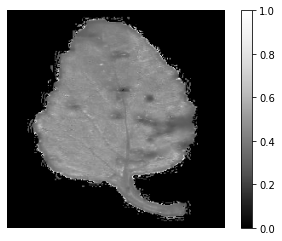

In [203]:
img = img.astype(float)
red = img[:, :, 2]
green = img[:, :, 1]
ndvi = (green - red) / (green + red)
ndvi[(red == 0) & (green == 0)] = 0

print(ndvi.min(), ndvi.max())

'''plot hist'''
mean=0.247
std=0.19
ndvi = (ndvi - mean) / std
ndvi = (ndvi + 3) / 6
_ = plt.hist(ndvi.flatten(), np.arange(0, 1.001, 1e-2))

# '''Show ndvi'''
ndvi[(red == 0) & (green == 0)] = 0
ndvi[(ndvi < 0) | (ndvi > 1)] = 0
plt.imshow(ndvi, cmap='Greys_r', vmin=0, vmax=1)
plt.colorbar()
plt.axis('off')

<Figure size 432x288 with 0 Axes>

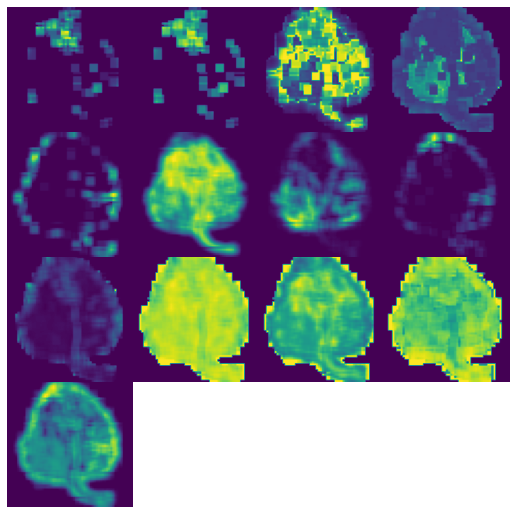

In [220]:
features = torch.load('..\\data\\Bacterial_spot_ndvi_sample.pth')[0]
plot(features, mean=True)

<Figure size 432x288 with 0 Axes>

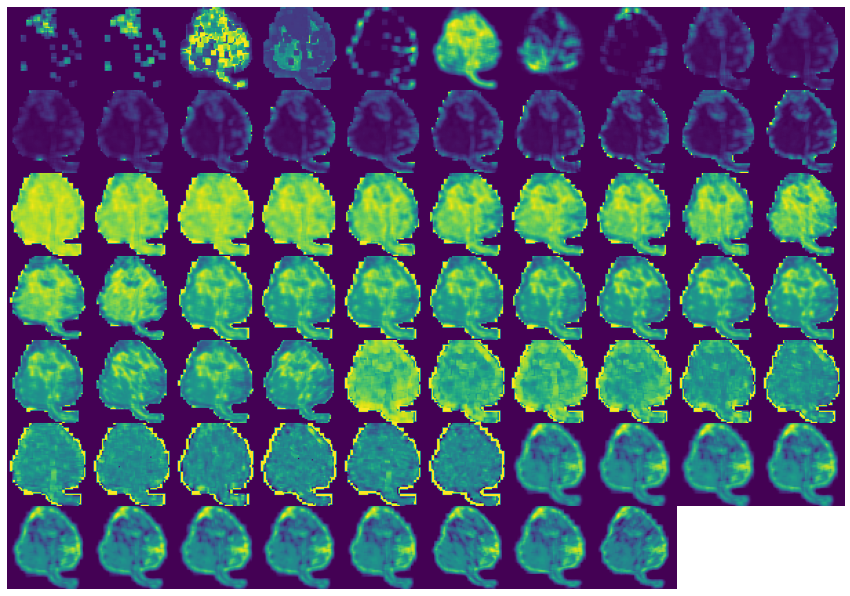

In [221]:
features = torch.load('..\\data\\Bacterial_spot_ndvi_sample.pth')[0]
plot(features, mean=False)